In [1]:
# extend the width of the notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
display(HTML("<style>.output_result { width:95% !important; }</style>"))

# autoreload allows changes to modules on the fly (no need for reloading them after a change in the code)
%load_ext autoreload
%autoreload 2

In [2]:
from plot_smeft import *
from smeft_train import *
import pickle
import os

## data

In [3]:
file_names = [
    f'/scratch-cbe/users/robert.schoefbeck/TMB/postprocessed/gen/v2/tschRefPointNoWidthRW/tschRefPointNoWidthRW_{n_file}.root:Events'
    for n_file in range(1)]

scalar_branches, vector_branches = get_branch_names()

scalar_events, vector_events, weights = load_data(file_names=file_names)

w0 = weights[:,0,np.newaxis]

w1_0 = weights[:,1,np.newaxis]/w0

In [4]:
test_file_names = [
    f'/scratch-cbe/users/robert.schoefbeck/TMB/postprocessed/gen/v2/tschRefPointNoWidthRW/tschRefPointNoWidthRW_{n_file}.root:Events'
    for n_file in range(50,51)]

test_scalar_events, test_vector_events, test_weights = load_data(file_names=test_file_names)

test_w0 = test_weights[:,0,np.newaxis]

test_w1_0 = test_weights[:,1,np.newaxis]/test_w0

## eval

In [5]:
from matplotlib import colors

In [6]:
model_files = []
for file in os.listdir():
    if file.endswith('.pkl') and file.startswith('epoch'): model_files.append(file)
n_plots = int(np.ceil(np.sqrt(len(model_files))))     

saved file to /groups/hephy/cms/oskar.rothbacher/www/pytorch/genTops/genTops/pred_vs_truth_history.png


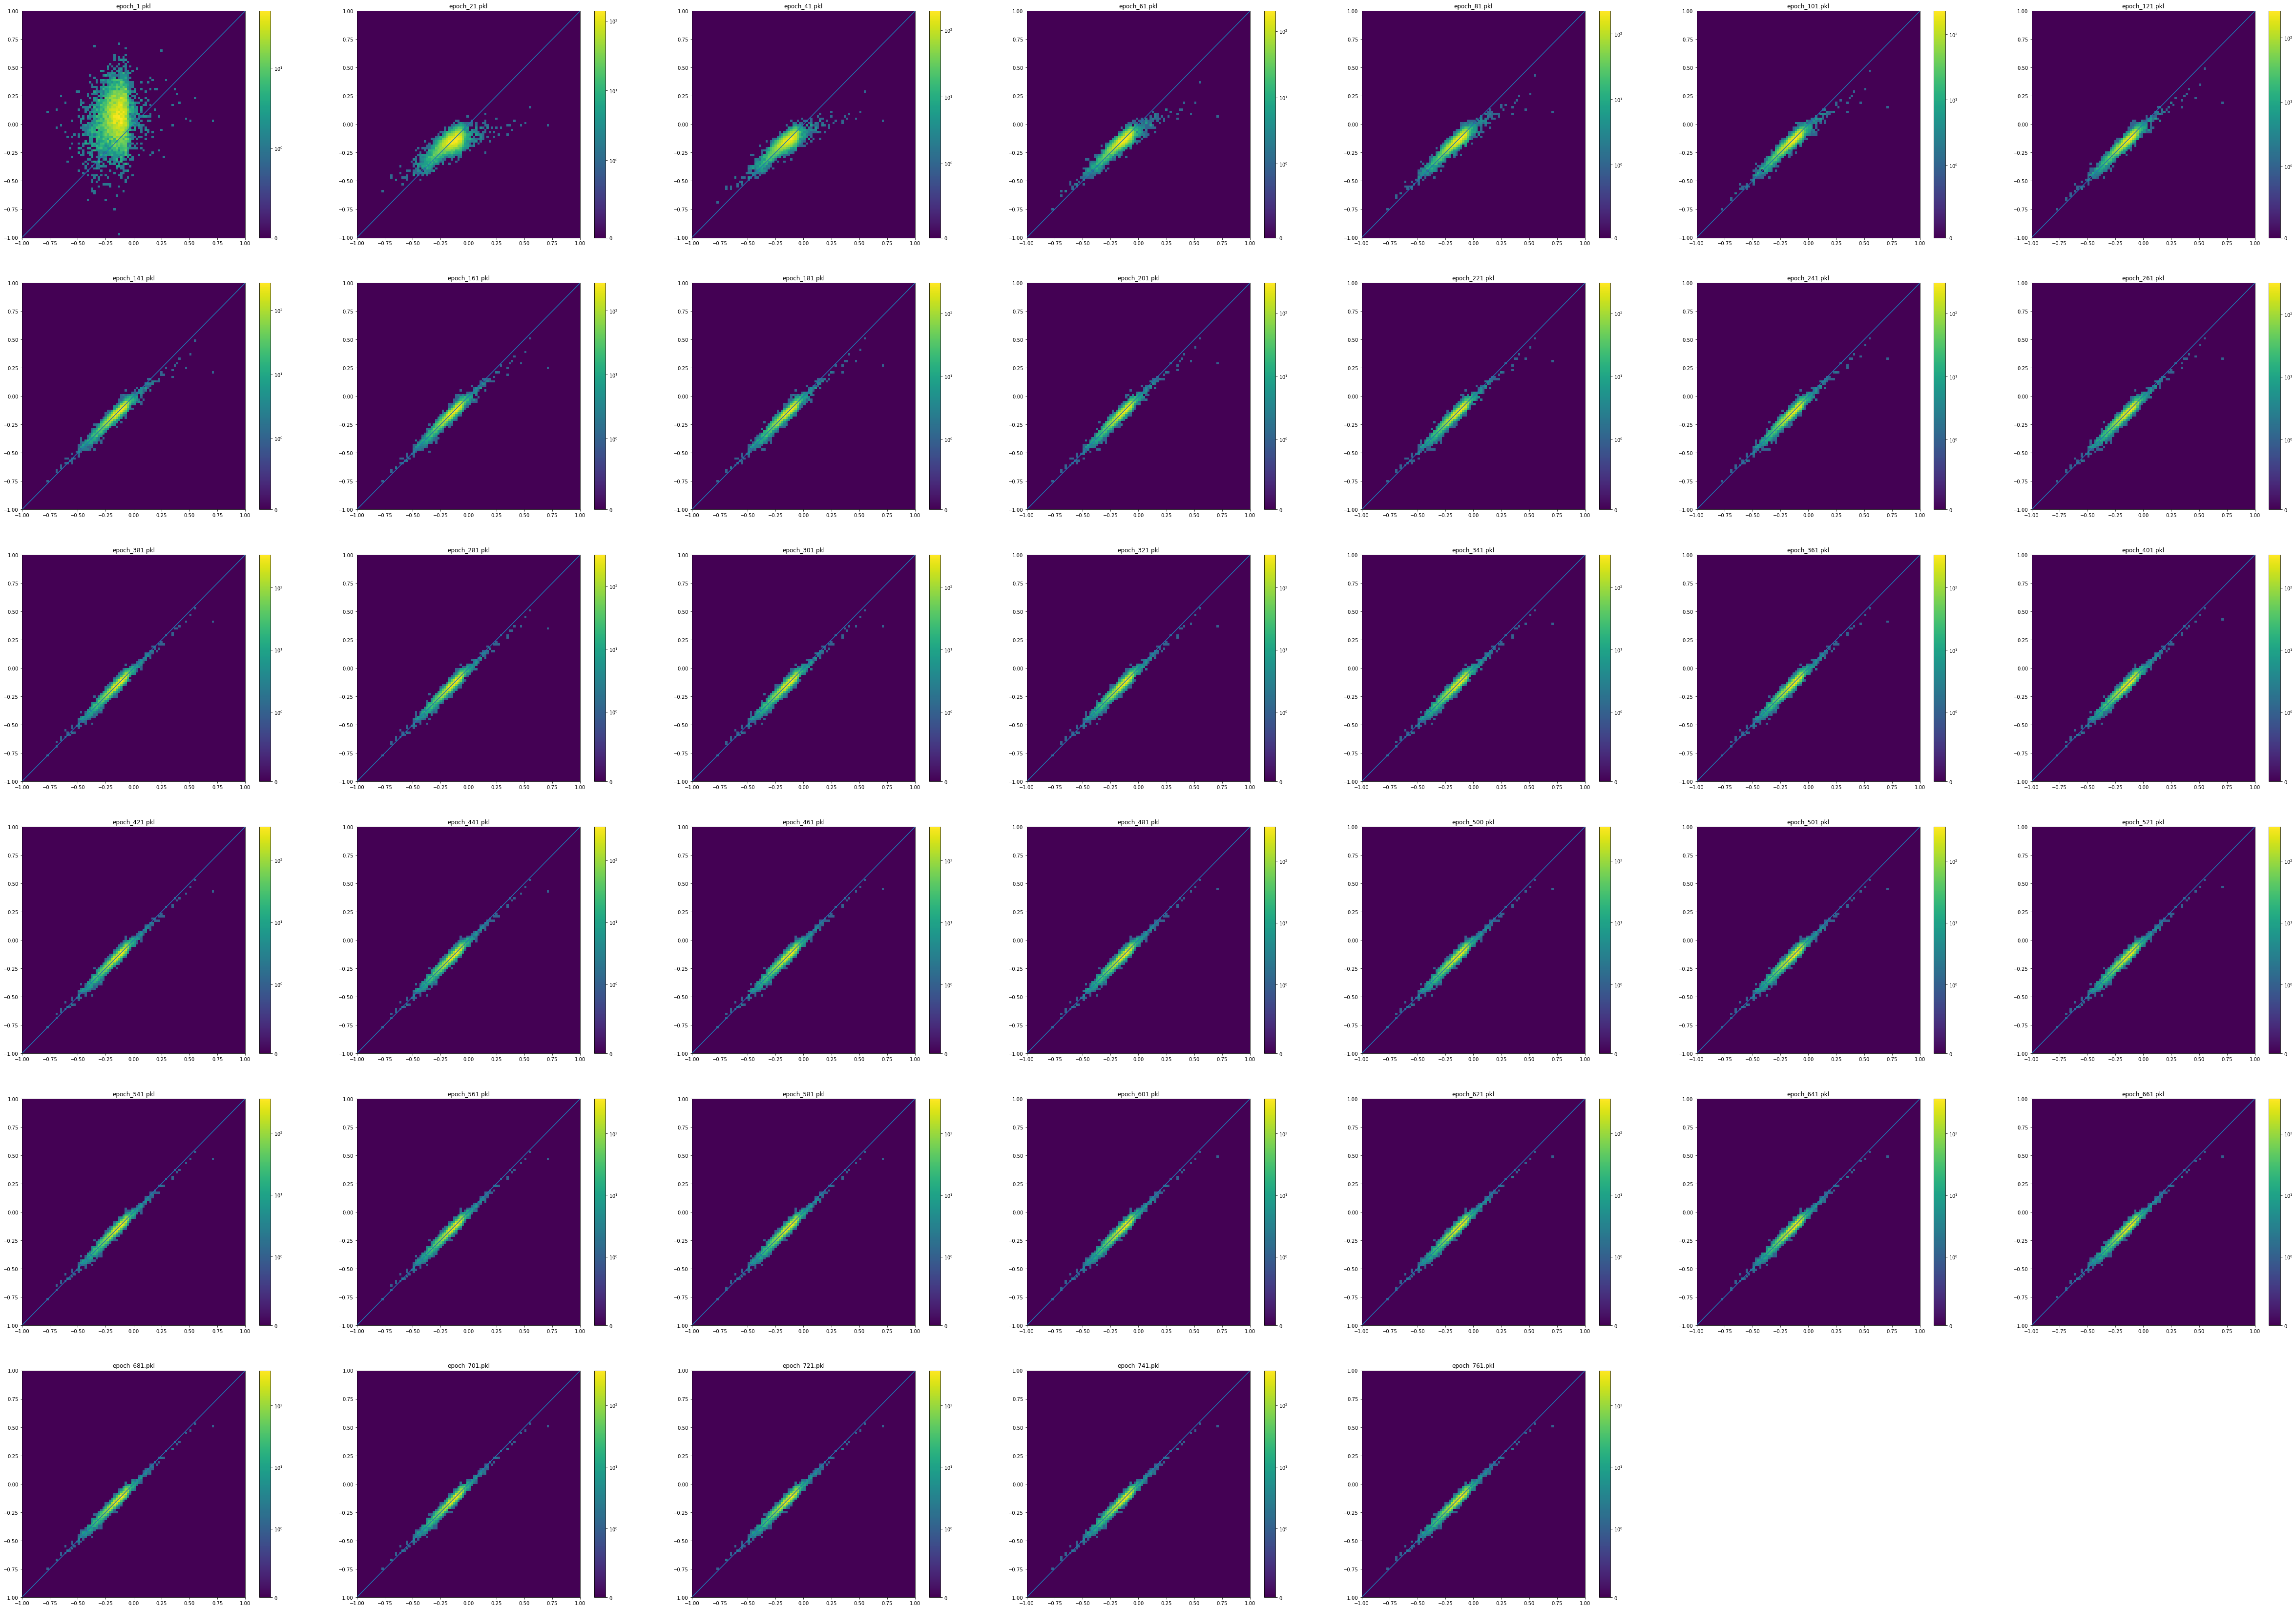

In [7]:
plt.subplots(figsize=[12*n_plots,10*n_plots])
for n, m_f in enumerate(model_files):
    with open(m_f, 'rb') as f:
        model = pickle.load(f)
    pred=model(torch.tensor(scalar_events)).detach().numpy()
    
    plt.subplot(n_plots, n_plots, n+1)
    plt.hist2d(w1_0.flatten(), pred.flatten(), range=[[-1.,1.],[-1.,1.]], bins=100, norm=colors.SymLogNorm(1))
    plt.plot([-1,1],[-1,1])
    plt.colorbar()
    plt.title(m_f)
    
plt.savefig(os.path.join(plot_directory,"pred_vs_truth_history.png"))
print(f'saved file to {os.path.join(plot_directory,"pred_vs_truth_history.png")}')
plt.show()

saved file to /groups/hephy/cms/oskar.rothbacher/www/pytorch/genTops/genTops/pred_vs_truth_history_test.png


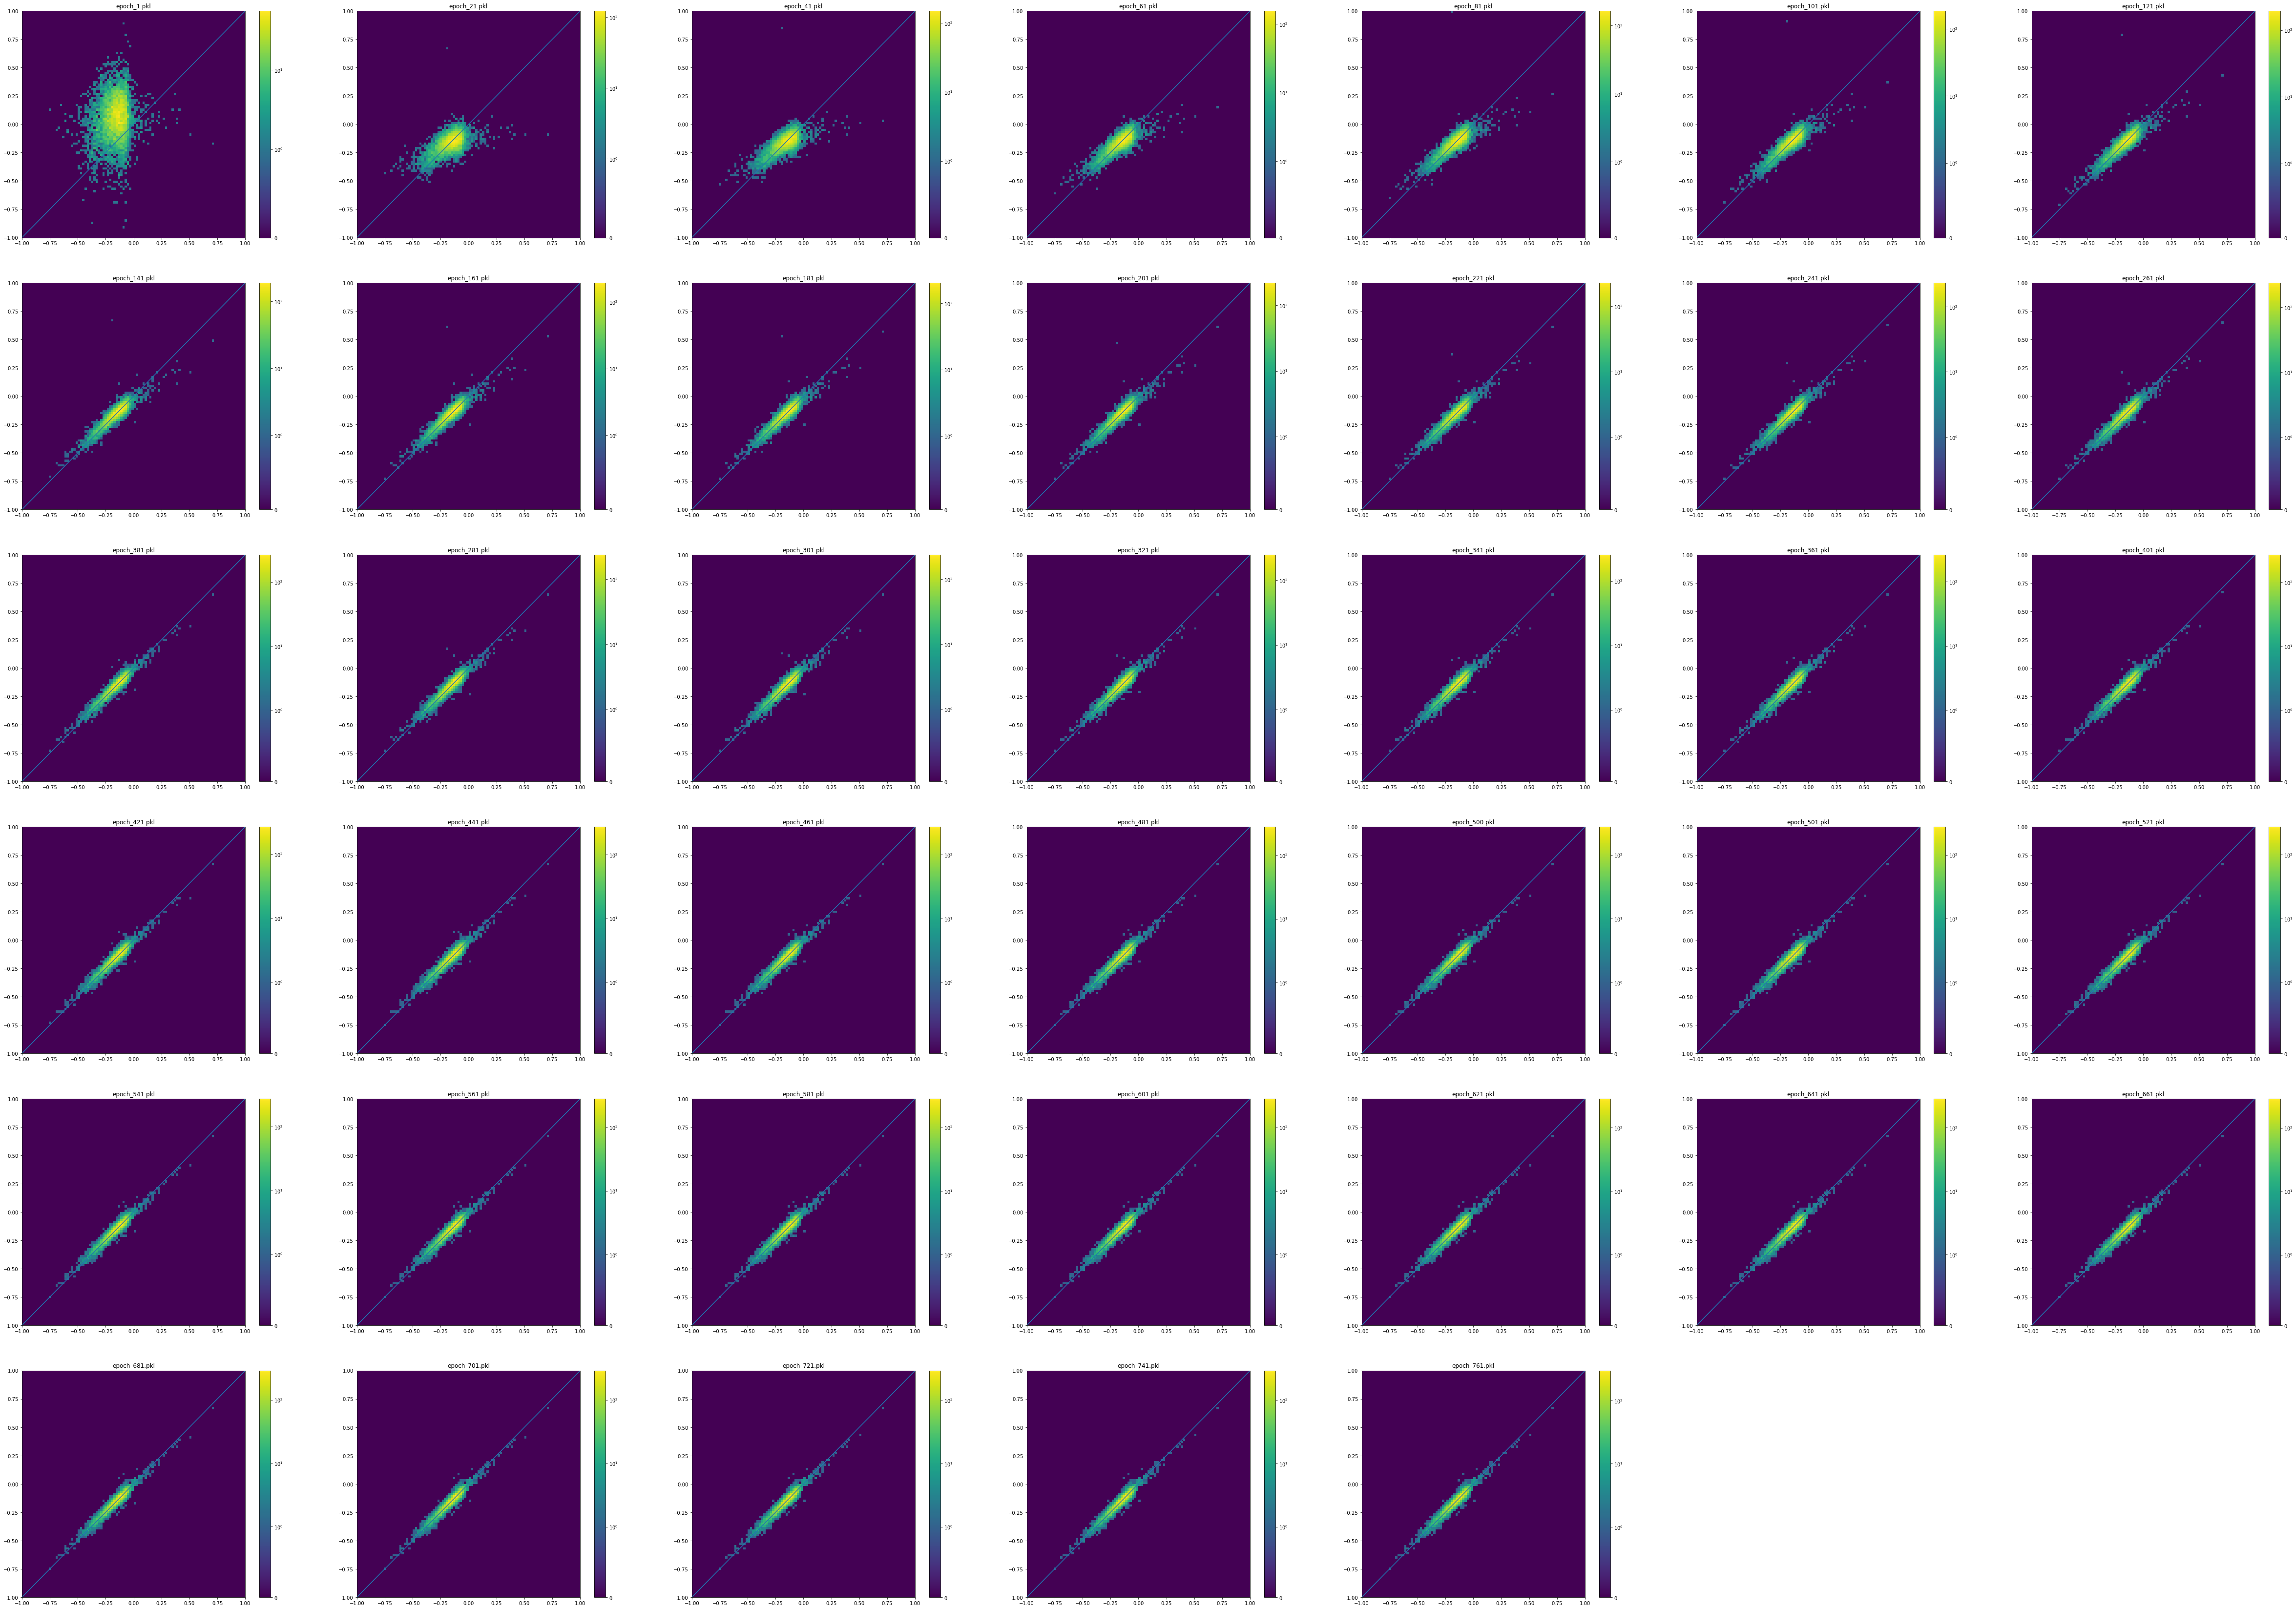

In [8]:
plt.subplots(figsize=[12*n_plots,10*n_plots])
for n, m_f in enumerate(model_files):
    with open(m_f, 'rb') as f:
        model = pickle.load(f)
    pred=model(torch.tensor(test_scalar_events)).detach().numpy()
    
    plt.subplot(n_plots, n_plots, n+1)
    plt.hist2d(test_w1_0.flatten(), pred.flatten(), range=[[-1.,1.],[-1.,1.]], bins=100, norm=colors.SymLogNorm(1))
    plt.plot([-1,1],[-1,1])
    plt.colorbar()
    plt.title(m_f)
    
plt.savefig(os.path.join(plot_directory,"pred_vs_truth_history_test.png"))
print(f'saved file to {os.path.join(plot_directory,"pred_vs_truth_history_test.png")}')
plt.show()

In [45]:
with open('epoch_681.pkl', 'rb') as f:
    model = pickle.load(f)
    print((torch.tensor(w1_0)-model(torch.tensor(scalar_events))).detach().numpy())

[[ 0.00877209]
 [-0.01448506]
 [ 0.02309728]
 ...
 [-0.01528972]
 [-0.02302785]
 [ 0.00274059]]


In [11]:
os.path.curdir

'.'